In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


class Neural_Network(object):
    def __init__(self):
        #Define Parameters
        self.inputLayerSize = 2
        self.outputLayerSize=1
        self.hiddenLayerSize=3
        
        #Define Weights
        self.W1=np.random.rand(self.inputLayerSize,self.hiddenLayerSize)
        self.W2=np.random.rand(self.hiddenLayerSize,self.outputLayerSize)

    def forward(self,X):
        #Propagate inputs through network
        self.z2 = np.dot(X,self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.W2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def sigmoid(self, z):
        #Apply Sigmoid Activation Function
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Derivative of Sigmoid Function
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute Cost Function with weights already stored in class
        self.yHat=self.forward(X)
        J=0.5*sum((y-self.yHat)**2)
        return J
    
    def costFunctionPrime(self, X, y):
        #Compute derivatives with respect to W1 and W2
        self.yHat=self.forward(X)
        delta3 = np.multiply(-(y-self.yHat),self.sigmoidPrime(self.z3))
        dJdW2=np.dot(self.a2.T,delta3)
        delta2=np.dot(delta3,self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1=np.dot(X.T,delta2)
        return dJdW1,dJdW2
    

In [2]:
X=np.array(([3,5],[5,1],[10,1]),dtype=float)
y=np.array(([75],[80],[93]),dtype=float)

In [3]:
X


array([[ 3.,  5.],
       [ 5.,  1.],
       [10.,  1.]])

In [4]:
y

array([[75.],
       [80.],
       [93.]])

In [5]:
X=X/np.amax(X,axis=0)
y=y/100

In [6]:
X,y


(array([[0.3, 1. ],
        [0.5, 0.2],
        [1. , 0.2]]),
 array([[0.75],
        [0.8 ],
        [0.93]]))

In [7]:
NN=Neural_Network()

In [8]:
yH=NN.forward(X)

In [9]:
yH

array([[0.70978761],
       [0.68862365],
       [0.70229903]])

In [10]:
y

array([[0.75],
       [0.8 ],
       [0.93]])

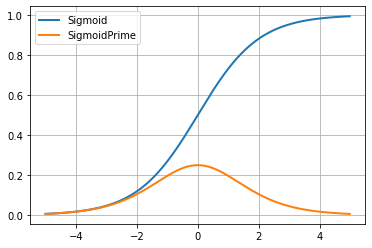

In [11]:
testValues=np.arange(-5,5,0.01)
plt.plot(testValues,NN.sigmoid(testValues),linewidth=2)
plt.plot(testValues, NN.sigmoidPrime(testValues),linewidth=2)
plt.grid(1)
plt.legend(['Sigmoid','SigmoidPrime'])


In [12]:
NN=Neural_Network()

In [13]:
cost1=NN.costFunction(X,y)

In [14]:
cost1

array([0.01584022])

In [15]:
dJdW1,dJdW2=NN.costFunctionPrime(X,y)

In [16]:
dJdW1

array([[-0.00656823, -0.00204962, -0.00374788],
       [-0.00125182, -0.00037673, -0.00067778]])

In [17]:
dJdW2

array([[-0.0292915 ],
       [-0.02532899],
       [-0.02332233]])

In [18]:
scalar=1
NN.W1 = NN.W1+scalar*dJdW1
NN.W2 = NN.W2+scalar*dJdW2
cost2 = NN.costFunction(X,y)
print (cost1,cost2)

[0.01584022] [0.01811396]


In [19]:
scalar=0.1
NN.W1 = NN.W1-scalar*dJdW1
NN.W2 = NN.W2-scalar*dJdW2
cost3 = NN.costFunction(X,y)
print (cost2,cost3)

[0.01811396] [0.01787132]


# program that minimizes the cost function to a given accuracy (0.001)

In [20]:
scalar = 5
cost_array = [cost1]
num_iterations = 0

def move_forward(scalar):
    dJdW1,dJdW2=NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1+scalar*dJdW1
    NN.W2 = NN.W2+scalar*dJdW2
    cost2 = NN.costFunction(X,y)
    cost_array.append(cost2)
    return cost2

def move_backward(scalar):
    dJdW1,dJdW2=NN.costFunctionPrime(X,y)
    NN.W1 = NN.W1-scalar*dJdW1
    NN.W2 = NN.W2-scalar*dJdW2
    cost3 = NN.costFunction(X,y)
    cost_array.append(cost3)
    return cost3

while cost_array[len(cost_array)-1] > 0.001:
    cost2 = move_forward(scalar)[0]
    num_iterations +=1
    cost3 = move_backward(scalar)[0]
    num_iterations +=1
    if cost2 < cost3:
        move_forward(scalar)[0]
        num_iterations +=1
    else:
        move_backward(scalar)[0]
        num_iterations +=1
    
    

cost_array


[array([0.01584022]),
 array([0.0378628]),
 array([0.0094558]),
 array([0.00823276]),
 array([0.00874124]),
 array([0.00807557]),
 array([0.00785237]),
 array([0.00799256]),
 array([0.00782754]),
 array([0.00773109]),
 array([0.00781194]),
 array([0.00772581]),
 array([0.007654]),
 array([0.00772222]),
 array([0.00765262]),
 array([0.00758664]),
 array([0.00765159]),
 array([0.00758613]),
 array([0.00752189]),
 array([0.0075857]),
 array([0.00752159]),
 array([0.00745813]),
 array([0.00752132]),
 array([0.00745789]),
 array([0.00739497]),
 array([0.00745766]),
 array([0.00739475]),
 array([0.0073323]),
 array([0.00739453]),
 array([0.00733209]),
 array([0.00727008]),
 array([0.00733187]),
 array([0.00726987]),
 array([0.00720829]),
 array([0.00726967]),
 array([0.00720809]),
 array([0.00714693]),
 array([0.00720789]),
 array([0.00714673]),
 array([0.00708597]),
 array([0.00714654]),
 array([0.00708578]),
 array([0.00702541]),
 array([0.00708559]),
 array([0.00702523]),
 array([0.006965

In [21]:
cost_array[len(cost_array)-1]

array([0.00099883])

# plot cost vs iteration

In [24]:
d = {'iterations': np.arange(num_iterations+1), 'cost': cost_array}

In [25]:
import pandas as pd

In [26]:
df = pd.DataFrame(data = d)

In [27]:
df['cost'] = df['cost'].apply(lambda x: x[0])

In [28]:
import matplotlib.pyplot as plt

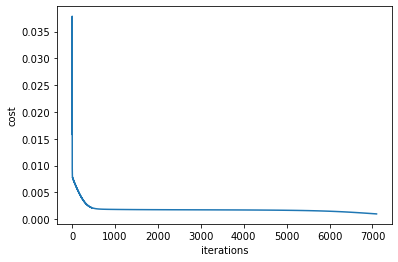

In [29]:
plt.plot(df['iterations'], df['cost'])
plt.xlabel('iterations');
plt.ylabel('cost');